In [1]:
import pandas as pd
import nltk
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df['tag'].value_counts()

O                4446206
B-indications      53003
I-indications      44624
Name: tag, dtype: int64

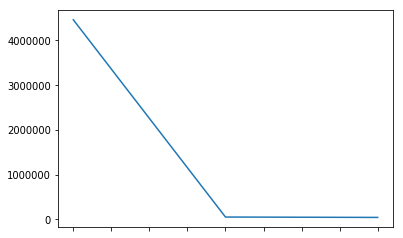

In [4]:
df['tag'].value_counts().plot()

In [10]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer(stop_words=None, max_features=100000, ngram_range=(1, 3))
lr = LogisticRegression()

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score

def lr_cv(splits, X, Y, pipeline, average_method):
    
    kfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=777)
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for train, test in kfold.split(X, Y):
        lr_fit = pipeline.fit(X[train], Y[train])
        prediction = lr_fit.predict(X[test])
        scores = lr_fit.score(X[test],Y[test])
        
        accuracy.append(scores * 100)
        precision.append(precision_score(Y[test], prediction, average=average_method)*100)
        print('              negative    neutral     positive')
        print('precision:',precision_score(Y[test], prediction, average=None))
        recall.append(recall_score(Y[test], prediction, average=average_method)*100)
        print('recall:   ',recall_score(Y[test], prediction, average=None))
        f1.append(f1_score(Y[test], prediction, average=average_method)*100)
        print('f1 score: ',f1_score(Y[test], prediction, average=None))
        print('-'*50)

    print("accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(accuracy), np.std(accuracy)))
    print("precision: %.2f%% (+/- %.2f%%)" % (np.mean(precision), np.std(precision)))
    print("recall: %.2f%% (+/- %.2f%%)" % (np.mean(recall), np.std(recall)))
    print("f1 score: %.2f%% (+/- %.2f%%)" % (np.mean(f1), np.std(f1)))

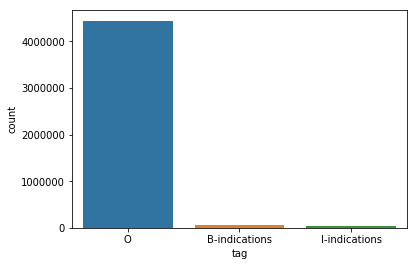

In [5]:
sns.countplot(df.tag)

In [6]:
df.drop(['id','Doc_ID','Sent_ID'],axis=1,inplace=True)
df.columns[df.isna().any()].tolist()
df['Word'] = df['Word'].fillna(df['Word'].mode()[0])

In [7]:
labels=df['tag']
trainX=df['Word']

In [9]:
from sklearn.pipeline import Pipeline
original_pipeline = Pipeline([
    ('vectorizer', tvec),
    ('classifier', lr)
])
lr_cv(5, trainX, labels, original_pipeline, 'macro')

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              negative    neutral     positive
precision: [0.75955781 0.62419589 0.98634626]
recall:    [0.31110273 0.33703081 0.99784311]
f1 score:  [0.44141069 0.43771828 0.99206138]
--------------------------------------------------
              negative    neutral     positive
precision: [0.74350011 0.61393055 0.98646982]
recall:    [0.32100745 0.33478992 0.99765418]
f1 score:  [0.44841218 0.43329466 0.99203048]
--------------------------------------------------
              negative    neutral     positive
precision: [0.75229568 0.6237395  0.98630802]
recall:    [0.30912178 0.33266106 0.99785435]
f1 score:  [0.43818948 0.43390574 0.99204759]
--------------------------------------------------
              negative    neutral     positive
precision: [0.77822676 0.6124031  0.98636062]
recall:    [0.30886792 0.34521008 0.99777113]
f1 score:  [0.44222327 0.44153052 0.99203307]
--------------------------------------------------
              negative    neutral     positive
precision

NameError: name 'np' is not defined

In [60]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

tvec = CountVectorizer()
lr = LogisticRegression()
original_pipeline = Pipeline([
    ('vectorizer', tvec),
    ('classifier', lr)
])
lr_fit = original_pipeline.fit(X_train, y_train)
prediction = lr_fit.predict(X_test)
#prediction = lr_fit.predict(X[test])

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [61]:
test=pd.read_csv('test.csv')

In [62]:
test.columns[test.isna().any()].tolist()

['Word']

In [63]:
test['Word'] = test['Word'].fillna(test['Word'].mode()[0])

In [64]:
df_test=test.copy()

In [65]:
tes=test['Word']

In [66]:
pre=lr_fit.predict(tes)

In [67]:
pre

array(['O', 'O', 'O', ..., 'O', 'O', 'O'], dtype=object)

In [68]:
df1=pd.read_csv('sample_submission.csv')

In [69]:
df1.drop(['tag'],inplace=True,axis=1)

In [70]:
df1['tag']=list(pre)

In [71]:
df1.head()

,id,Sent_ID,tag
0,4543834,191283,O
1,4543835,191283,O
2,4543836,191283,O
3,4543837,191283,O
4,4543838,191283,O


In [72]:
df1.to_csv('sample_submission_5.csv',index=False)

In [30]:
df_test['tag']


0          O
1          O
2          O
3          O
4          O
5          O
6          O
7          O
8          O
9          O
10         O
11         O
12         O
13         O
14         O
15         O
16         O
17         O
18         O
19         O
20         O
21         O
22         O
23         O
24         O
25         O
26         O
27         O
28         O
29         O
          ..
2994433    O
2994434    O
2994435    O
2994436    O
2994437    O
2994438    O
2994439    O
2994440    O
2994441    O
2994442    O
2994443    O
2994444    O
2994445    O
2994446    O
2994447    O
2994448    O
2994449    O
2994450    O
2994451    O
2994452    O
2994453    O
2994454    O
2994455    O
2994456    O
2994457    O
2994458    O
2994459    O
2994460    O
2994461    O
2994462    O
Name: tag, Length: 2994463, dtype: object

In [23]:
df_sub=df_test[['id','Sent_ID','tag']]

In [24]:
df_sub.to_csv('sub2.csv',index='False')

In [25]:
sh=pd.read_csv('sub2.csv')

In [27]:
sh.drop(['Unnamed: 0'],inplace=True,axis=1)

In [28]:
sh.to_csv('sub2.csv',index='False')

In [29]:
sh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2994463 entries, 0 to 2994462
Data columns (total 3 columns):
id         int64
Sent_ID    int64
tag        object
dtypes: int64(2), object(1)
memory usage: 68.5+ MB


In [34]:
sh['Sent_ID']

0          191283
1          191283
2          191283
3          191283
4          191283
5          191283
6          191283
7          191283
8          191284
9          191284
10         191284
11         191284
12         191284
13         191285
14         191285
15         191285
16         191285
17         191285
18         191285
19         191285
20         191285
21         191285
22         191285
23         191285
24         191285
25         191285
26         191286
27         191286
28         191286
29         191286
            ...  
2994433    317122
2994434    317122
2994435    317122
2994436    317122
2994437    317122
2994438    317122
2994439    317122
2994440    317122
2994441    317122
2994442    317122
2994443    317122
2994444    317122
2994445    317122
2994446    317122
2994447    317122
2994448    317122
2994449    317122
2994450    317122
2994451    317122
2994452    317122
2994453    317122
2994454    317122
2994455    317122
2994456    317122
2994457   

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainX, labels, train_size = 0.8)


C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
# Fit the CountVectorizer to the training data
vec = CountVectorizer().fit(X_train)

In [13]:
train_vectors = vec.transform(X_train)

In [15]:
test_vectors = vec.transform(X_test)

In [19]:
import numpy as np
X=np.array(train_vectors)

In [22]:
Y=np.array(test_vectors)

In [23]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=9)
X_sample3, y_sample3 = cc.fit_sample(X,Y)
sns.countplot(y_sample3)

TypeError: len() of unsized object

In [1]:
import pandas as pd
df=pd.read_csv('sample_submission.csv')

In [2]:
df.head()

,Unnamed: 0,id,Sent_ID,tag
0,0,4543834,191283,O
1,1,4543835,191283,O
2,2,4543836,191283,O
3,3,4543837,191283,O
4,4,4543838,191283,O


In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df.to_csv('sample_submission1.csv',index=False)